In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [68]:
data = pd.read_csv("/home/ubuntu/Ranjeet/DSBDAL/Social_Network_Ads.csv")


In [69]:
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [70]:
data.shape

(400, 3)

In [71]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [72]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [73]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


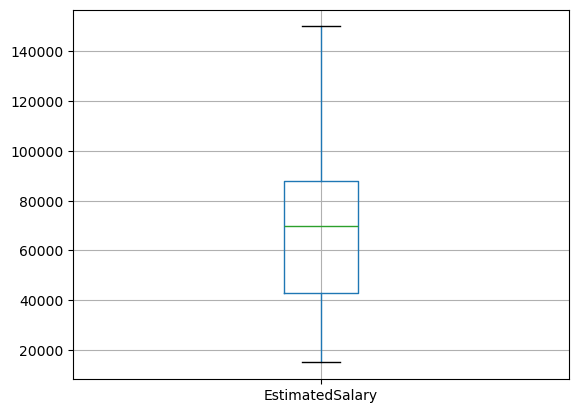

In [74]:
col=['EstimatedSalary']
data.boxplot(col)
plt.show()

In [75]:
data=data[data['EstimatedSalary']<=110000]

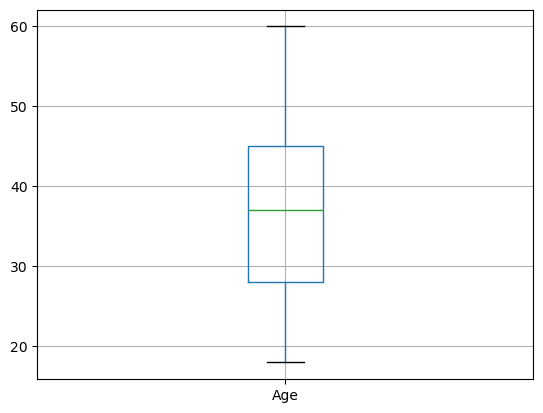

In [76]:
col=['Age']
data.boxplot(col)
plt.show()

In [77]:
data=data[data['Age']<=50]

In [78]:
data.describe()

,Age,EstimatedSalary,Purchased
count,306.000000,306.000000,306.000000
mean,34.673203,59019.607843,0.199346
std,8.534082,23641.300507,0.400163
min,18.000000,15000.000000,0.000000
25%,28.000000,41000.000000,0.000000
50%,35.000000,60000.000000,0.000000
75%,41.000000,79000.000000,0.000000
max,50.000000,108000.000000,1.000000


## Exploratory Data Analysis

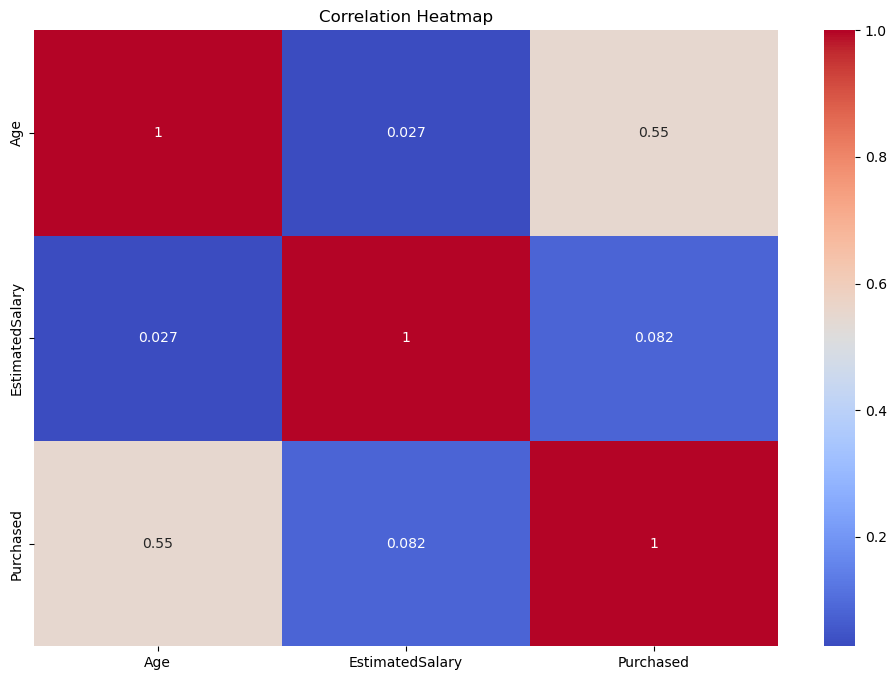

In [79]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

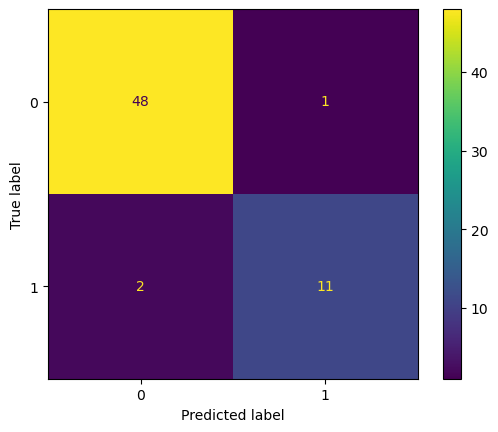

In [80]:
X=data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Initialize and train the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show() 

In [81]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.9516129032258065

In [82]:
Precision = metrics.precision_score(y_test, y_pred)
Precision

0.9166666666666666

In [83]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Sensitivity_recall

0.8461538461538461